## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [1]:


from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Assuming the file is in your Google Drive's "My Drive" folder
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-530/DDos.pcap_ISCX.csv"  # Update with your file's actual path

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    # You can now work with the DataFrame 'df'
    print(df.head())  # Display the first few rows of the DataFrame

except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file. Check if it is a valid CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
File loaded successfully!
                                   Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3      

In [2]:

df.tail()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,192.168.10.15-8.43.72.21-61326-80-6,8.43.72.21,80,192.168.10.15,61326,6,7/7/2017 5:02,68,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/DDoSdata.csv

Let's take a quick look at what the data looks like:

In [6]:
df.head(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Distribution graphs (histogram/bar graph) of sampled columns:

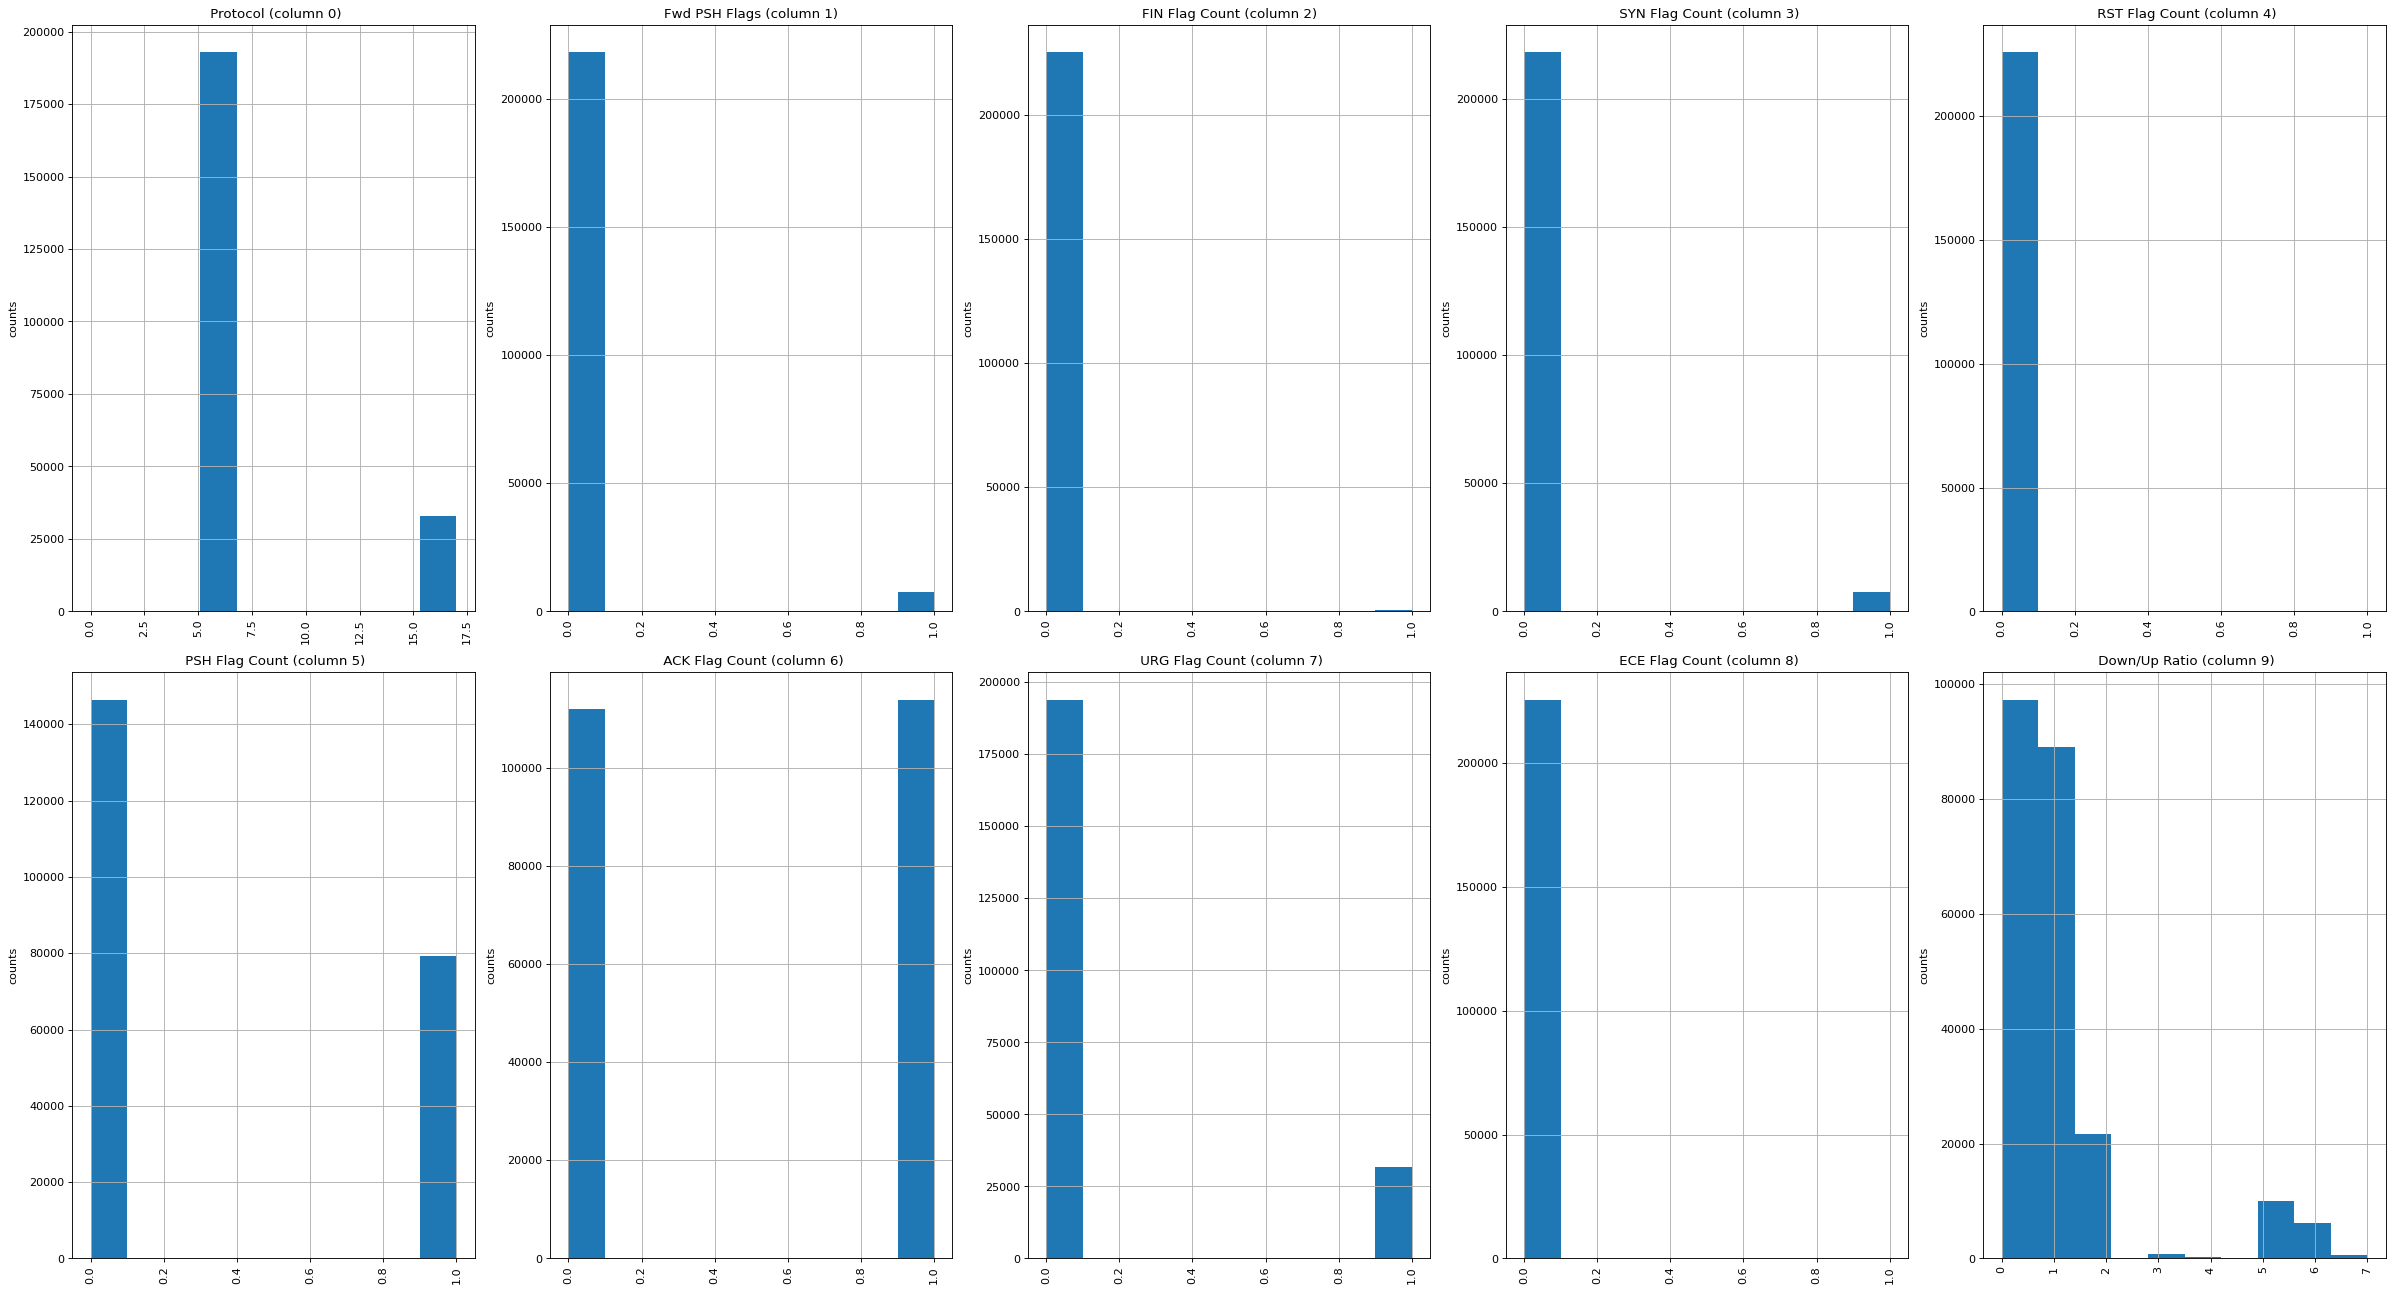

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plotPerColumnDistribution(df, 10, 5)

In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nGraphRow is an integer using floor division (//)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Correlation matrix:

In [20]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName #This line is causing the error
    filename = 'DDoSdata'  # Replace with a suitable name for your DataFrame
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

Scatter and density plots:

In [22]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')  # Changed 'columns' to axis='columns'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()



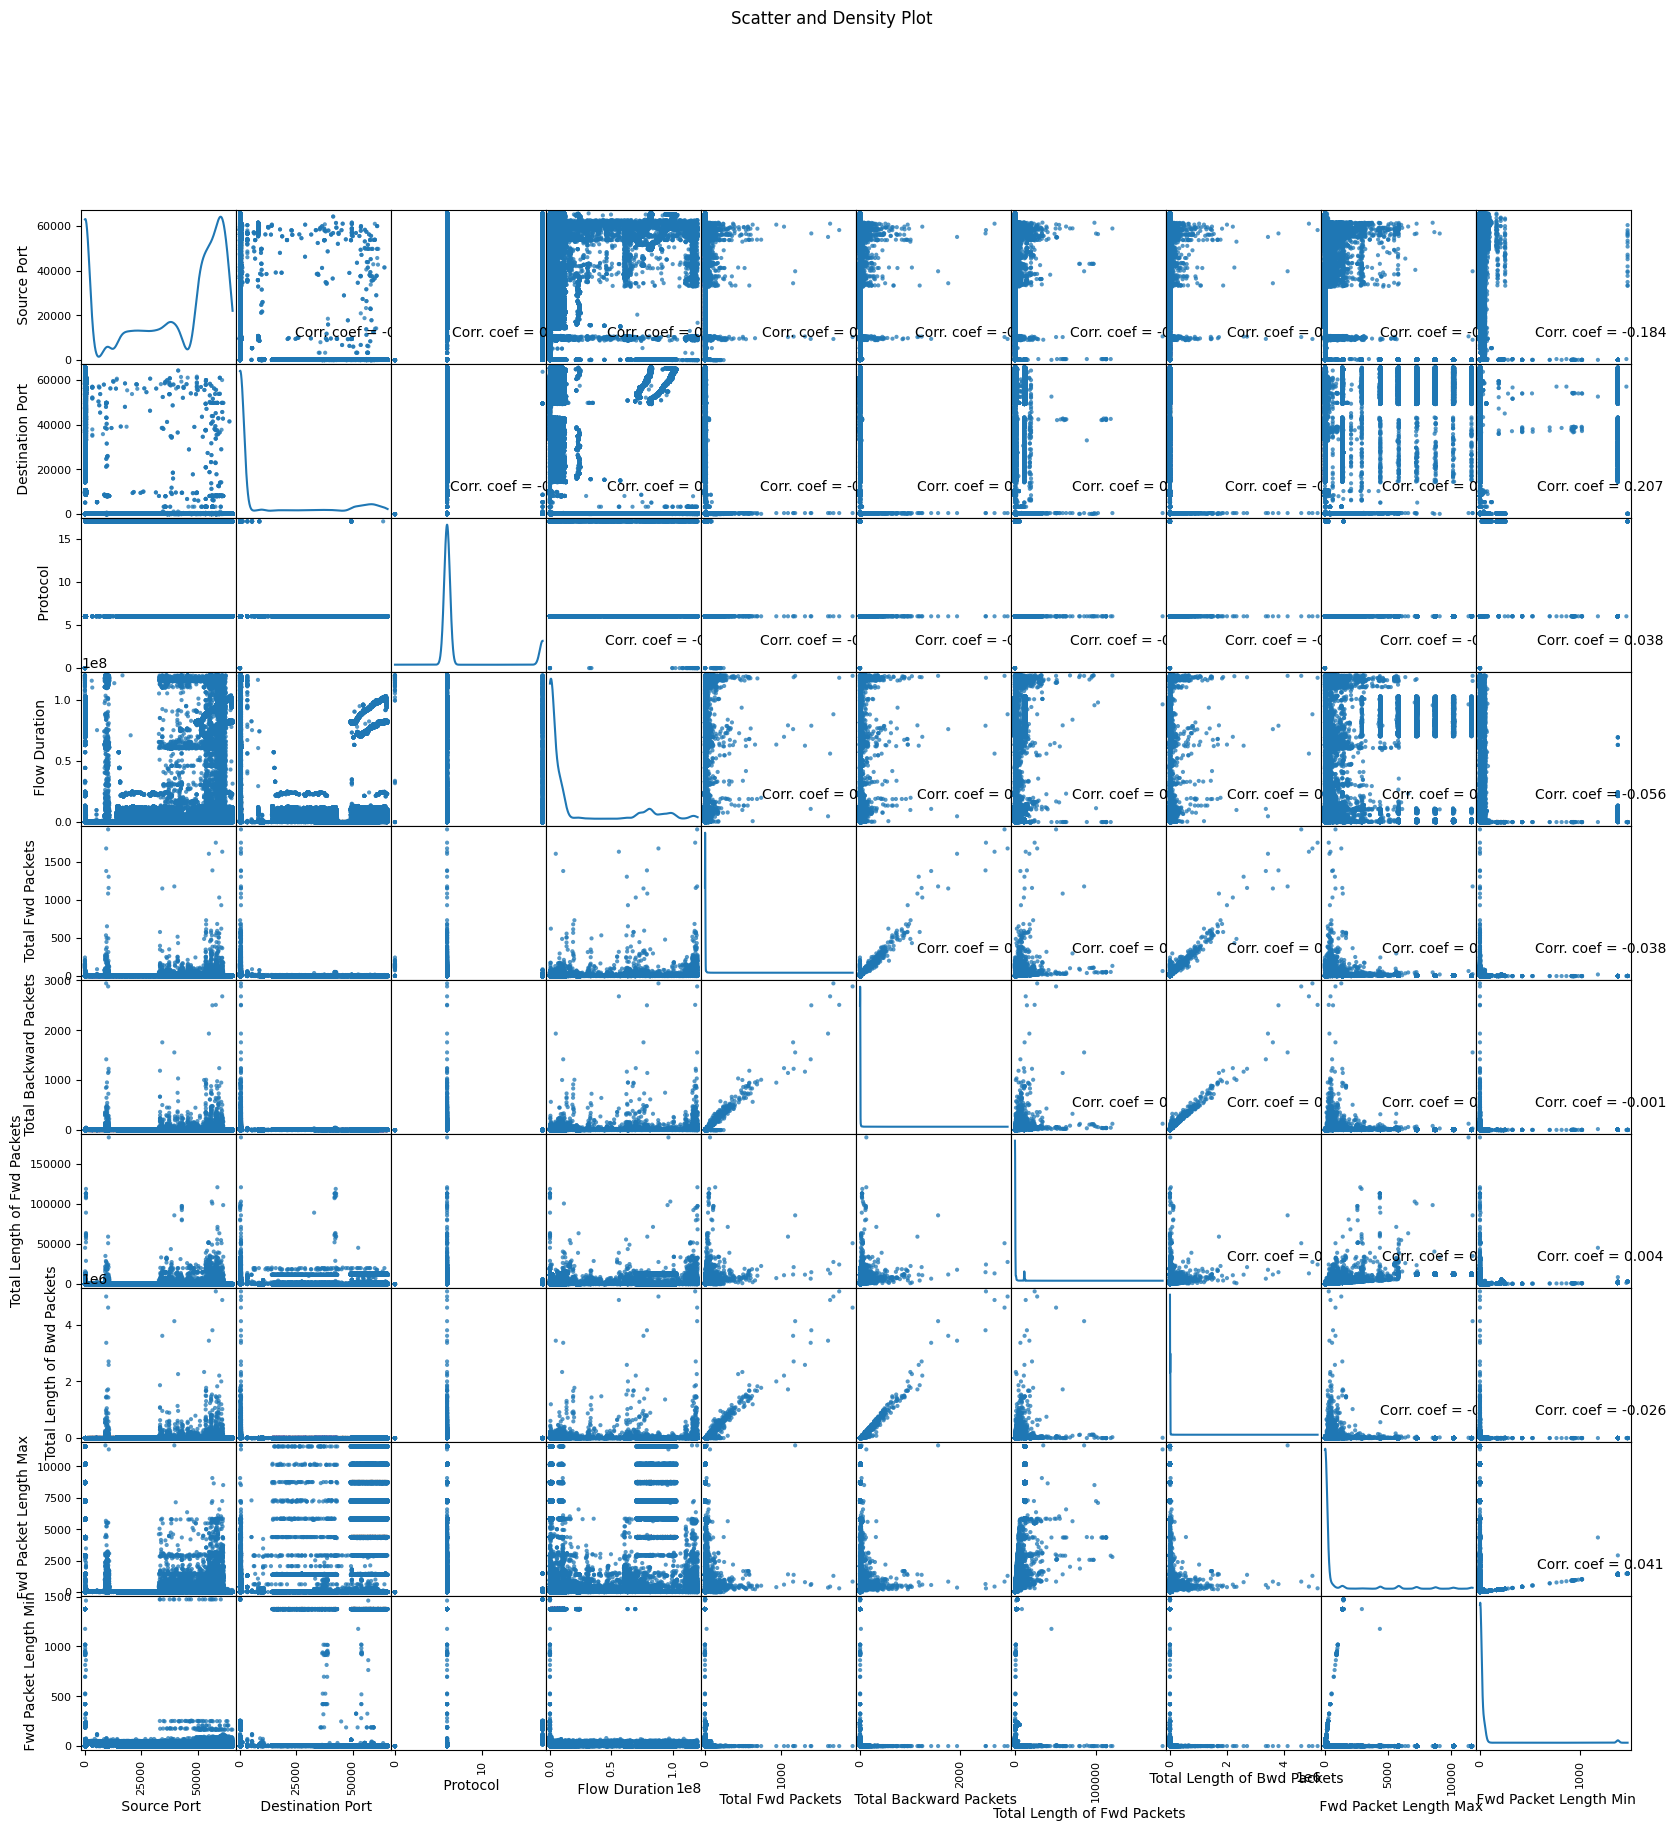

In [23]:
plotScatterMatrix(df, 20, 10)

In [25]:
# prompt: write timeseries to with input 5 mins and predict horizon 1 min with lstm

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load your time series data (replace with your actual file path)
# Assuming the file is in your Google Drive's "My Drive" folder
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-530/DDos.pcap_ISCX.csv"

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file. Check if it is a valid CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")


# Select a column for time series analysis (replace 'column_name' with your column)
if 'Flow Bytes/s' in df.columns:
    data = df['Flow Bytes/s'].values.reshape(-1, 1)
else:
    print("Error: 'Flow Bytes/s' column not found in the dataframe.")
    exit()

# Replace infinite values with NaN
data = np.nan_to_num(data, posinf=np.nan, neginf=np.nan)

# Drop rows with NaN values
data = data[~np.isnan(data)].reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Define lookback period (5 minutes) and prediction horizon (1 minute)
lookback = 5
horizon = 1

# Create the dataset for LSTM
X, y = [], []
for i in range(len(data) - lookback - horizon + 1):
    X.append(data[i:(i + lookback), 0])
    y.append(data[i + lookback + horizon - 1, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size, :], X[train_size:len(X), :]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32) # Reduced epochs for demonstration

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))

print('Train RMSE: %.2f RMSE' % (train_rmse))
print('Test RMSE: %.2f RMSE' % (test_rmse))

File loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 54s 9ms/step - loss: 4.8203e-05
Epoch 2/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 7.1053e-05
Epoch 3/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - loss: 4.2815e-05
Epoch 4/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - loss: 3.2456e-05
Epoch 5/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 79s 9ms/step - loss: 5.4752e-05
Epoch 6/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 55s 10ms/step - loss: 6.2986e-05
Epoch 7/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - loss: 9.4850e-05
Epoch 8/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - loss: 8.7795e-05
Epoch 9/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - loss: 9.1169e-05
Epoch 10/10
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 50s 9ms/step - loss: 4.7538e-05
5643/5643 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Train RMSE: 15453611.14 RMSE
Test RMSE: 21688805.04 RMSE


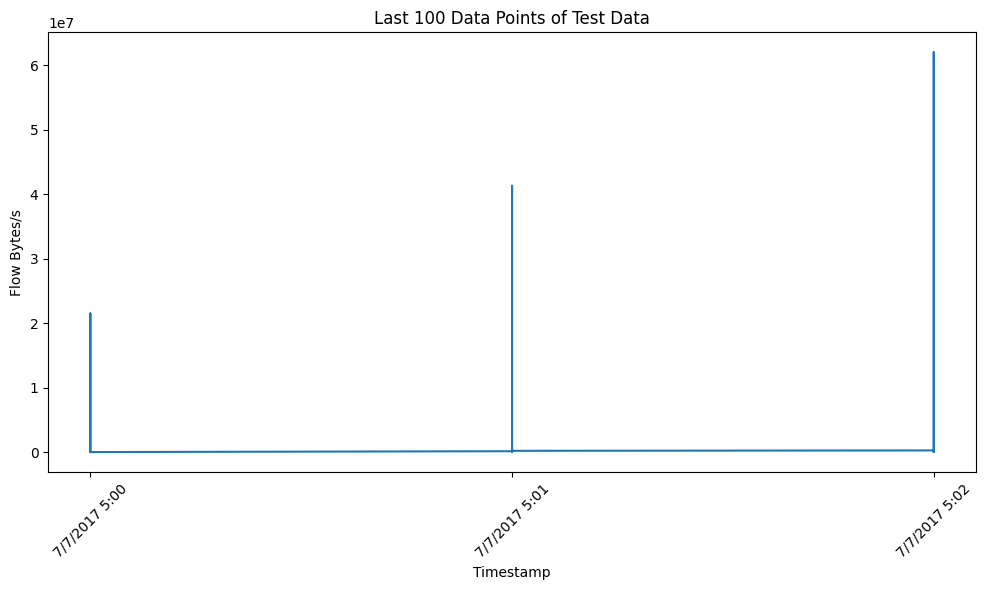

In [38]:
# prompt: plot the  last 100 points of test data using timestamp on x axis

import matplotlib.pyplot as plt

# Assuming 'df' and 'y_test' are defined from the previous code
# and 'df' contains a 'Timestamp' column

# Check if 'Timestamp' column exists
if ' Timestamp' not in df.columns:
    print("Error: 'Timestamp' column not found in the DataFrame.")
else:
    # Get the last 100 timestamps and corresponding y_test values
    last_100_timestamps = df[' Timestamp'].tail(1000)
    last_100_y_test = y_test[0][-1000:]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(last_100_timestamps, last_100_y_test)
    plt.xlabel("Timestamp")
    plt.ylabel("Flow Bytes/s")
    plt.title("Last 100 Data Points of Test Data")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


In [35]:
print(df.head())
df.columns



                                   Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3                   2                        0  ...   
1   

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [43]:
print(df[' Label'])

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name:  Label, Length: 225745, dtype: object


In [45]:
print(df[' Flow Packets/s'])

0         666666.66670
1          18348.62385
2          38461.53846
3          58823.52941
4         666666.66670
              ...     
225740     32786.88525
225741     27777.77778
225742     26666.66667
225743     41666.66667
225744     29411.76471
Name:  Flow Packets/s, Length: 225745, dtype: float64


In [47]:
print(df['Flow Bytes/s'])

0         4.000000e+06
1         1.100917e+05
2         2.307692e+05
3         3.529412e+05
4         4.000000e+06
              ...     
225740    1.967213e+05
225741    1.666667e+05
225742    1.600000e+05
225743    2.500000e+05
225744    1.764706e+05
Name: Flow Bytes/s, Length: 225745, dtype: float64


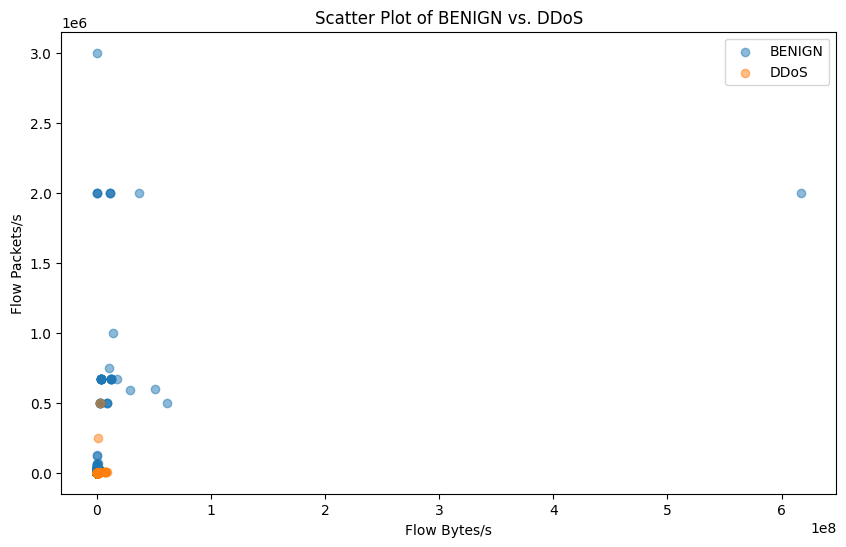

In [54]:
#detect 2000 points for BENIGN or DDOS and plot

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a 'Label' column
# and relevant columns for plotting (e.g., 'Flow Bytes/s', ' Flow Packets/s')

# Check if 'Label' and necessary columns exist
if ' Label' not in df.columns or 'Flow Bytes/s' not in df.columns or ' Flow Packets/s' not in df.columns:
    print("Error: Required columns (' Label', 'Flow Bytes/s', ' Flow Packets/s') not found in the DataFrame.")
else:
    # Filter for BENIGN and DDOS
    benign_df = df[df[' Label'] == 'BENIGN'].head(1000)
    ddos_df = df[df[' Label'] == 'DDoS'].head(1000)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(benign_df['Flow Bytes/s'], benign_df[' Flow Packets/s'], label='BENIGN', alpha=0.5)
    plt.scatter(ddos_df['Flow Bytes/s'], ddos_df[' Flow Packets/s'], label='DDoS', alpha=0.5)
    plt.xlabel("Flow Bytes/s")
    plt.ylabel("Flow Packets/s")
    plt.title("Scatter Plot of BENIGN vs. DDoS")
    plt.legend()
    plt.show()


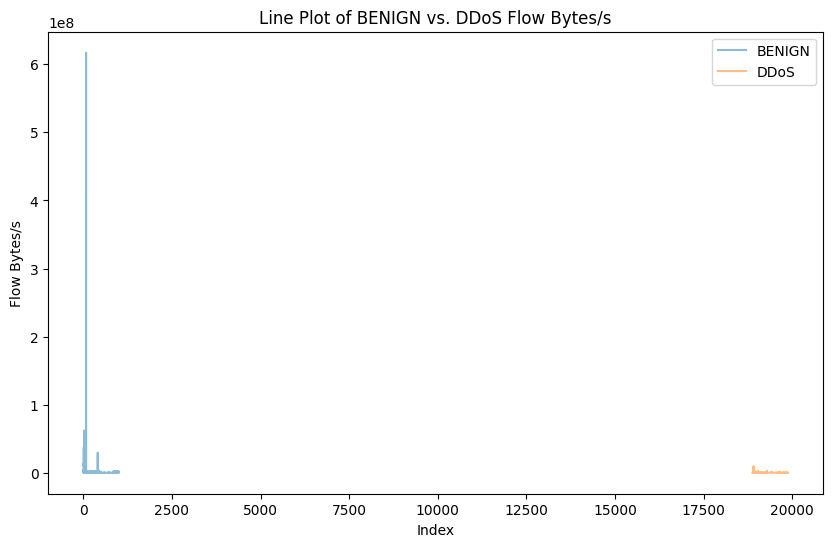

In [55]:


import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a 'Label' column
# and relevant columns for plotting (e.g., 'Flow Bytes/s', ' Flow Packets/s')

# Check if 'Label' and necessary columns exist
if ' Label' not in df.columns or 'Flow Bytes/s' not in df.columns or ' Flow Packets/s' not in df.columns:
    print("Error: Required columns (' Label', 'Flow Bytes/s', ' Flow Packets/s') not found in the DataFrame.")
else:
    # Filter for BENIGN and DDOS
    benign_df = df[df[' Label'] == 'BENIGN'].head(1000)
    ddos_df = df[df[' Label'] == 'DDoS'].head(1000)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(benign_df['Flow Bytes/s'], label='BENIGN', alpha=0.5)
    plt.plot(ddos_df['Flow Bytes/s'], label='DDoS', alpha=0.5)
    plt.xlabel("Index") # Assuming index represents the time series progression
    plt.ylabel("Flow Bytes/s")
    plt.title("Line Plot of BENIGN vs. DDoS Flow Bytes/s")
    plt.legend()
    plt.show()


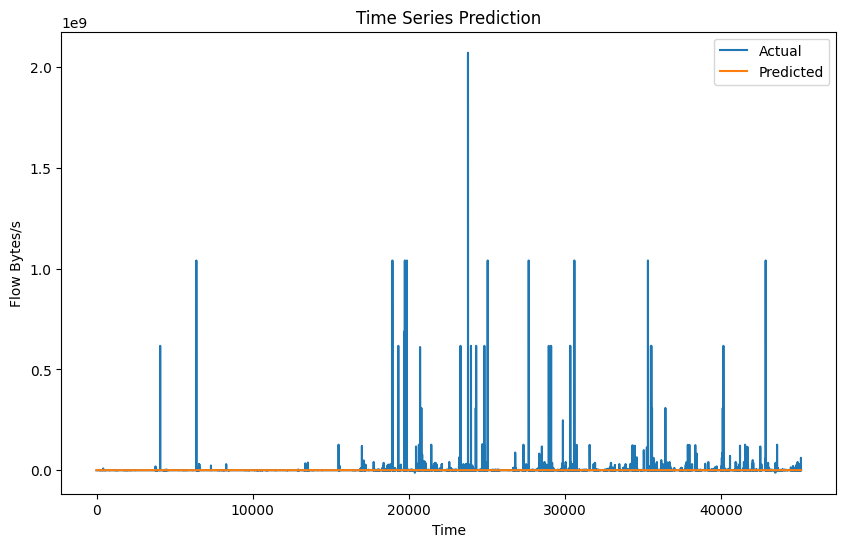

In [56]:
# prompt: plot timeseries prediction

import matplotlib.pyplot as plt
# Assuming 'test_predict' and 'y_test' are defined from the previous code

# Check if the required variables exist
if 'test_predict' not in locals() or 'y_test' not in locals():
    print("Error: 'test_predict' or 'y_test' not found.")
else:
    # Plotting the predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[0], label='Actual')
    plt.plot(test_predict[:,0], label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Flow Bytes/s')
    plt.title('Time Series Prediction')
    plt.legend()
    plt.show()


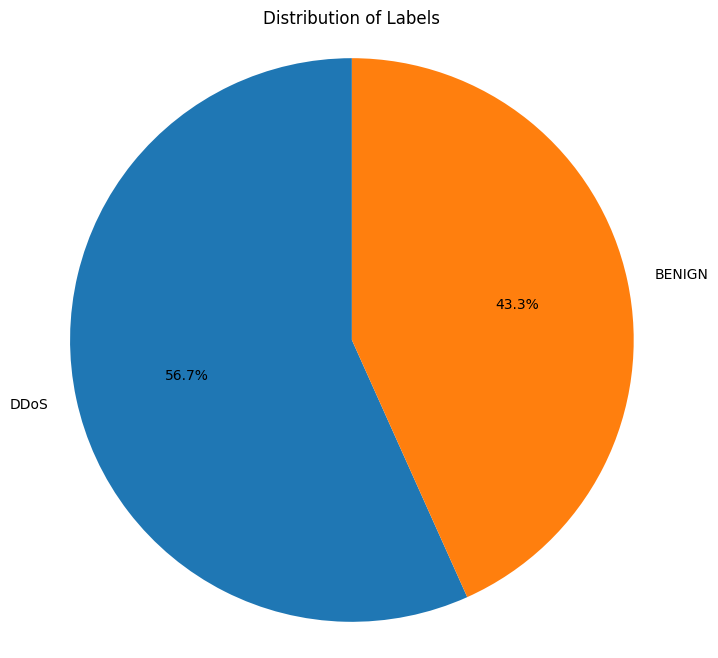

In [57]:
# prompt: plot pie graph for label

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a 'Label' column
# Check if 'Label' column exists
if ' Label' not in df.columns:
    print("Error: 'Label' column not found in the DataFrame.")
else:
    # Count the occurrences of each label
    label_counts = df[' Label'].value_counts()

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Labels')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


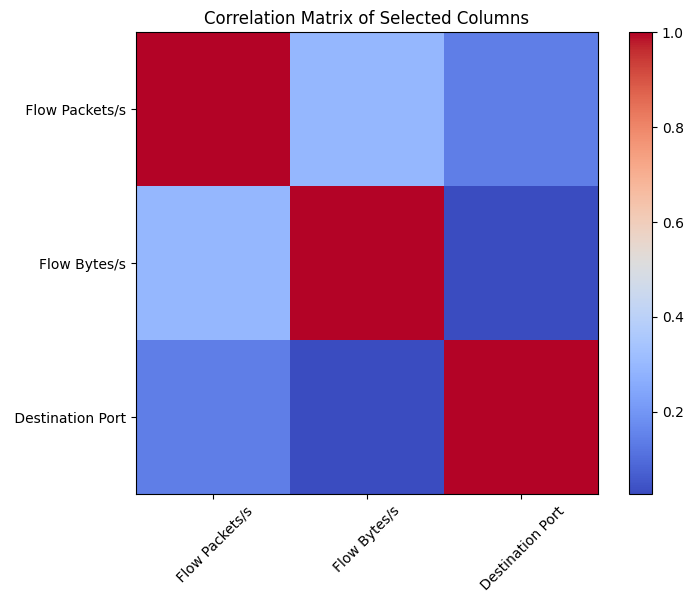

In [61]:
# prompt: plot correlation for few columns

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select the columns you want to analyze
columns_to_analyze = [' Flow Packets/s', 'Flow Bytes/s', ' Destination Port']  # Example columns

# Check if all columns exist in the DataFrame
if not all(col in df.columns for col in columns_to_analyze):
    print("Error: Not all specified columns exist in the DataFrame.")
else:
    # Calculate the correlation matrix for the selected columns
    correlation_matrix = df[columns_to_analyze].corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(columns_to_analyze)), columns_to_analyze, rotation=45)
    plt.yticks(range(len(columns_to_analyze)), columns_to_analyze)
    plt.title('Correlation Matrix of Selected Columns')
    plt.show()


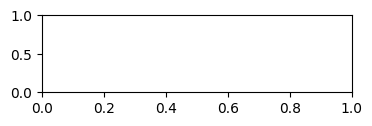

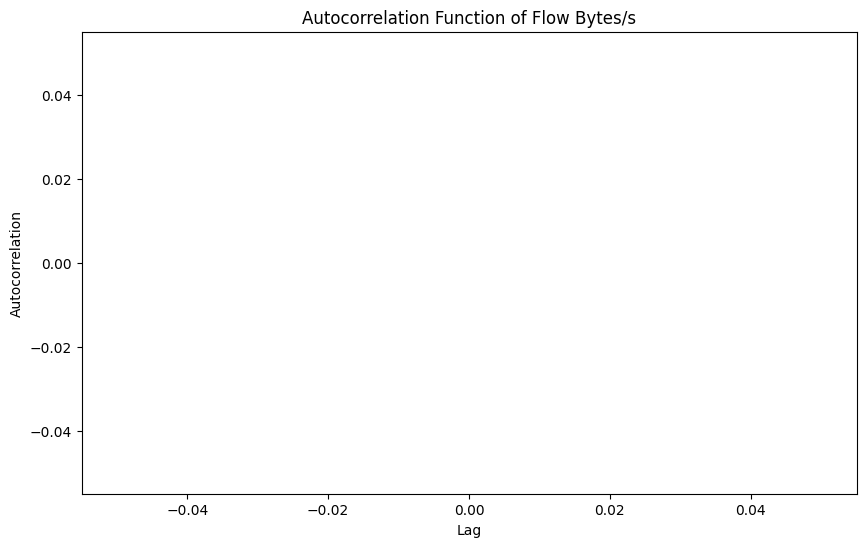

In [64]:
# prompt: generate autocorrelation

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Assuming 'df' and 'y_test' are defined from the previous code
# and 'df' contains a 'Timestamp' column

# Check if 'Timestamp' column exists
if ' Timestamp' not in df.columns:
    print("Error: 'Timestamp' column not found in the DataFrame.")
else:
    # Example: Calculate autocorrelation for 'Flow Bytes/s'
    if 'Flow Bytes/s' in df.columns:
        # Extract the 'Flow Bytes/s' data
        flow_bytes_data = df['Flow Bytes/s']

        # Calculate the autocorrelation function (ACF)
        autocorrelation = acf(flow_bytes_data, nlags=20)  # Adjust nlags as needed

        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.plot(autocorrelation)
        plt.xlabel("Lag")
        plt.ylabel("Autocorrelation")
        plt.title("Autocorrelation Function of Flow Bytes/s")
        plt.show()
    else:
      print("Error: 'Flow Bytes/s' column not found in DataFrame.")


In [66]:
# prompt: print vlaues

print(df[' Label'].unique())
print(df[' Flow Packets/s'].unique())
print(df['Flow Bytes/s'].unique())


['BENIGN' 'DDoS']
[6.66666667e+05 1.83486238e+04 3.84615385e+04 ... 1.13237917e+02
 2.15683808e+02 5.59743264e+01]
[4.00000000e+06 1.10091743e+05 2.30769231e+05 ... 3.35845959e+02
 5.40838852e+04 5.71428571e+02]


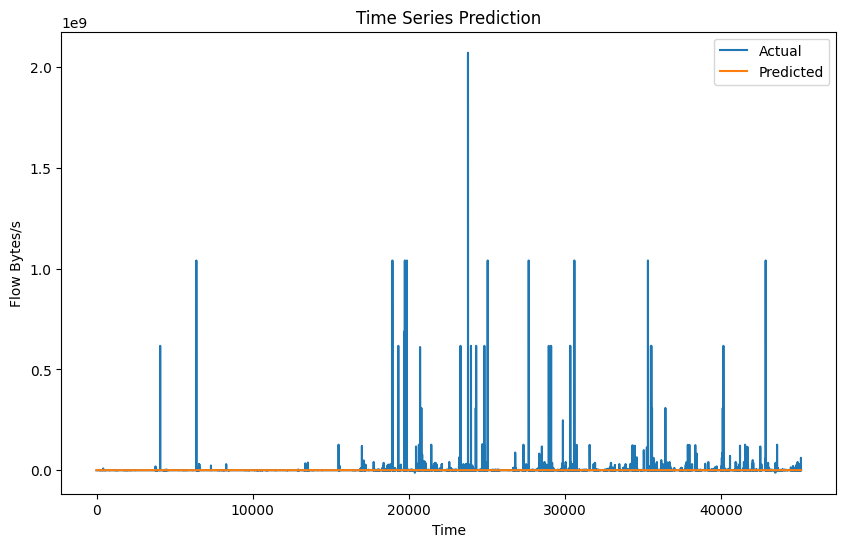

In [73]:
# prompt: print timeseries analysis plot

import matplotlib.pyplot as plt
# Assuming 'test_predict' and 'y_test' are defined from the previous code

# Check if the required variables exist
if 'test_predict' not in locals() or 'y_test' not in locals():
    print("Error: 'test_predict' or 'y_test' not found.")
else:
    # Plotting the predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[0], label='Actual')
    plt.plot(test_predict[:,0], label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Flow Bytes/s')
    plt.title('Time Series Prediction')
    plt.legend()
    plt.show()
